Use any additional libraries you want, but if you don't explicitly code stuff that I have explicitly asked you to code, you will not get marks.

### Q1. Kernel k-means

Let's try and end our course on a happy note. The smiley dataset you see below is made up of many clusters of points. 

In [89]:
import numpy as np
import numpy.linalg as lin
import numpy.random as rnd
from matplotlib import pyplot as plt


def getFigure( sizex = 7, sizey = 7 ):
    fig = plt.figure( figsize = (sizex, sizey) )
    return fig

def plot2D( X, fig, color = 'r', marker = '+', size = 100, empty = False ):
    plt.figure( fig.number )
    if empty:
        plt.scatter( X[:,0], X[:,1], s = size, facecolors = 'none', edgecolors = color, marker = marker  )
    else:
        plt.scatter( X[:,0], X[:,1], s = size, c = color, marker = marker )


def genCrescentData( d, n, mu, r, flipped = False ):
    X = np.vstack( (np.cos( np.linspace( 0, np.pi, n ) ), np.sin( np.linspace( 0, np.pi, n ) ) ) ).T
    if flipped:
        X[:,1] = -np.abs( X[:,1] )
    else:
        X[:,1] = np.abs( X[:,1] )
    X = (X * r) + mu
    return X

def genSphericalData( d, n, mu, r ):
    X = rnd.normal( 0, 1, (n, d) )
    norms = lin.norm( X, axis = 1 )
    X = X / norms[:, np.newaxis]
    X = (X * r) + mu
    return X

In [146]:
d = 2
n = 200

mu1 = np.array( [0,0] )
mu2 = np.array( [0,1] )
mu3 = np.array( [0,0] )
mu4 = np.array( [-3,5] )
mu5 = np.array( [3,5] )

tmp1 = genCrescentData( d, n, mu1, 1 )
tmp2 = genCrescentData( d, n, mu2, 5, flipped = True )
tmp3 = genSphericalData( d, n, mu3, 10 )
tmp4 = genSphericalData( d, n, mu4, 1 )
tmp5 = genSphericalData( d, n, mu5, 1 )
X = np.vstack( (tmp1, tmp2, tmp3, tmp4, tmp5) )

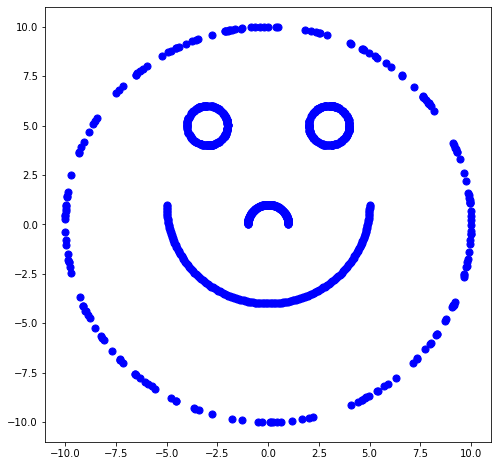

In [147]:
fig = getFigure( 8, 8 )
plot2D( X, fig, size = 50, color = 'b', marker = 'o' )

(a) Can you implement the k-means algorithm to cluster this dataset? Visualize your output. [10 points] 

(b) Implement k-means++ to initialize cluster centers usefully. [5 points]

(c) What value of k gives you the best clustering? Are you happy with the quality of the clustering? [5 points]


(d) I'm going to say that we want to be able to do better than this. So I want you to kernelize your k-means algorithm with a Gaussian kernel. Visualize the clustering output of your kernel k-means algorithm [15 points]

## Answer 1(a)

In [347]:
# function to reshape array. If array is newly created, then this function creates an empty array and then reshapes it.
def reshape_array(rows,dim2,newly_created):
    if newly_created==True:
        new_arr=np.array([]).reshape(rows,0)
    else:
        new_arr=np.array([]).reshape(rows,dim2)
        
    return new_arr

In [454]:
def k_means(means,X,centres):             #means denote number of clusters, X is data points, centres denote centroids of clusters
    no_of_data_points=len(X)
    no_of_clusters=means
    
    cluster_dict={}
    
    for i in range(150):
        l2_norm=np.array([])
        l2_norm=reshape_array(no_of_data_points,0,True)
        for k in range(no_of_clusters):
            curr_cluster=centres[:,k]
            curr_dist=np.sum((X-curr_cluster)**2,axis=1)  # compute l2 norms of current cluster from each point in X
            l2_norm=np.c_[l2_norm,curr_dist]   # <----------
        pos_of_min_dist_from_cluster=np.argmin(l2_norm,axis=1)+1  # pos=index+1
    
        #pos_of_min_dist_from_cluster    ---> print and see what is the structure and composition of this array is. In short, it contains position at which min distance cluster is present in l2 norm array for every data point
        
        #intialise each key of dictionary
        for k in range(1,no_of_clusters+1):
            cluster_dict[k]=reshape_array(2,0,True)
        
        
        for k in range(no_of_data_points):
            cluster_dict[pos_of_min_dist_from_cluster[k]]=np.c_[cluster_dict[pos_of_min_dist_from_cluster[k]],X[k]]
        
        
        for k in range(1,no_of_clusters+1):
            cluster_dict[k]=np.transpose(cluster_dict[k])
        
        #update mean of each cluster
        for k in range(no_of_clusters):
            centres[:,k]=np.mean(cluster_dict[k+1],axis=0)
            
    #plotting the visuals
    fig = getFigure( 8, 8 )
    for k in range(1,no_of_clusters+1):
        plt.scatter(cluster_dict[k][:,0],cluster_dict[k][:,1])
    plt.scatter(centres[0,:],centres[1,:],s=300,c='cyan')
    
    plt.show

    #each cluster is shown in different color.
    #centroid is shown in cyan color
    
    centres=centres.T
    return cluster_dict,centres

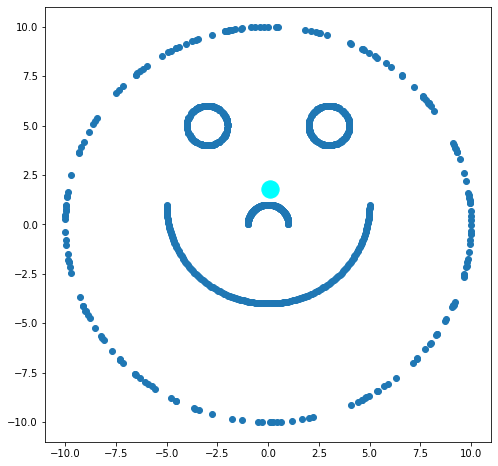

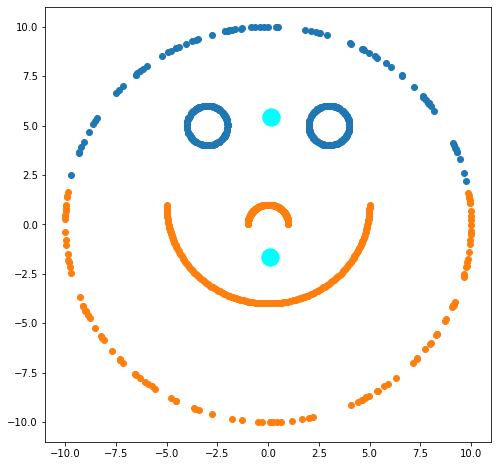

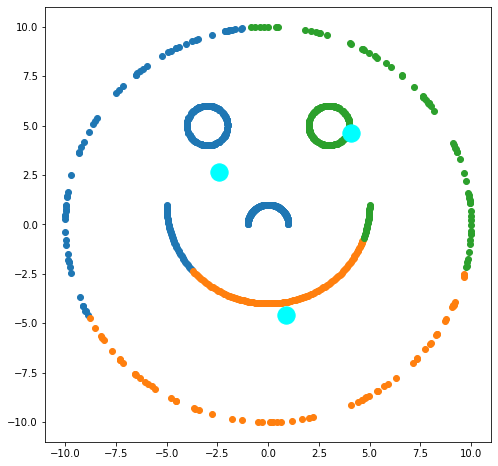

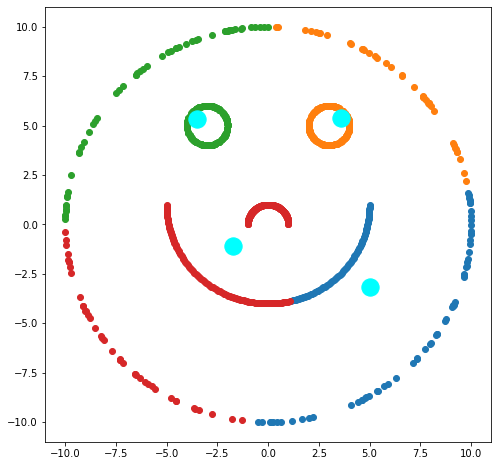

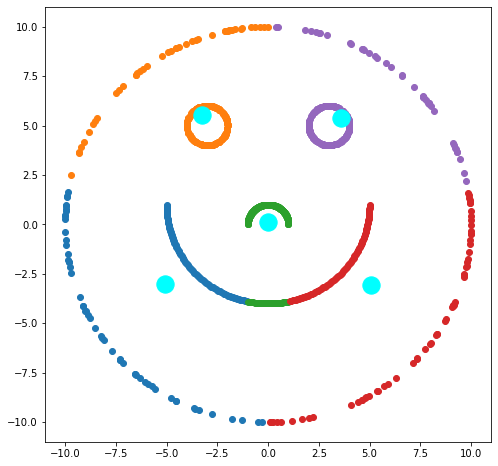

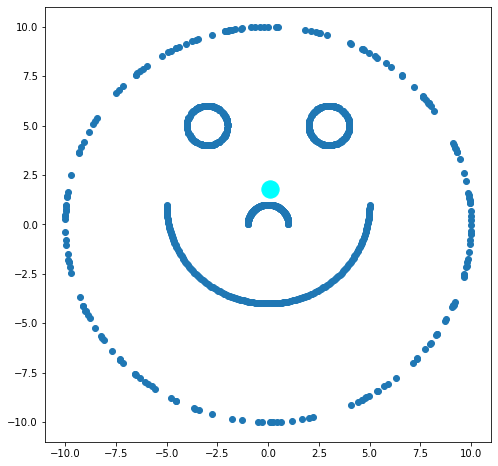

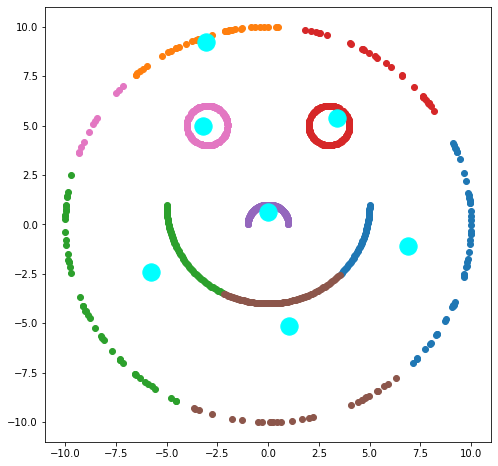

In [412]:
#here I am plotting visuals of clusters for number of clusters=1,2,3,4,5,6 and 7
for s in range(1,8):
    centres=reshape_array(2,0,True)   #create empty numpy array
    
    # randomly select s number of data points to behave as centroid of clusters
    for k in range(s):
        centres=np.c_[centres,X[np.random.randint(n)]]
    
    
    k_means(s,X,centres)


## Answer 1b

In [475]:
def k_means_pp(cluster_range_max):
    #now I am again plotting visuals of clusters for number of clusters=1,2,3,4,5,6 and 7 but now using kmeans++
    overall_clust_dict={}
    for s in range(1,cluster_range_max):
        centres=reshape_array(2,0,True)

        #select first centre uniformly and randomly
        j=np.random.randint(n)
        centres=np.array([X[j]])

        dist=reshape_array(2,0,True)

        #algorithm to select the next s-1 centres 
        for k in range(2,s+1):
            dist=np.array([])
            for p in range(len(X)):
                dist=np.append(dist,np.min(np.sum((X[p]-centres)**2)))
        
            normalising_factor=np.sum(dist)
            prob_of_each_point=dist/normalising_factor    #calcualting the probabilities of each data point to be selected as centroid
            cumulative_prob_of_each_point=np.cumsum(prob_of_each_point)  #converting the probabilities to cumulative form
    
            u=np.random.uniform(0,1)

            next_cluster_index=-1
            for j in range(len(cumulative_prob_of_each_point)):
                if u<cumulative_prob_of_each_point[j]:
                    next_cluster_index=j
                    break
            
            centres=np.append(centres,[X[next_cluster_index]],axis=0)
        k_means_pp_centres=centres.reshape(2,s)   
        #print(s)
        clust_dict,centres1=k_means(s,X,k_means_pp_centres)
        
        overall_clust_dict[s]=clust_dict,centres1
        
    return overall_clust_dict

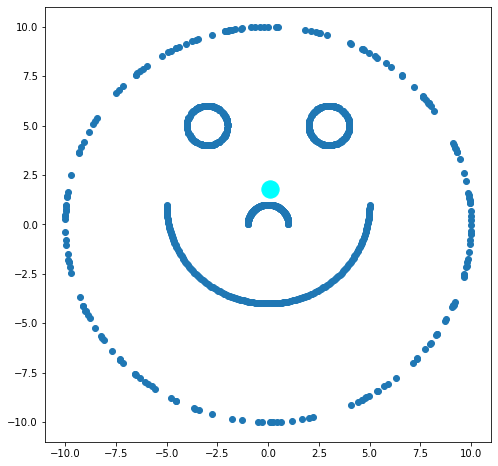

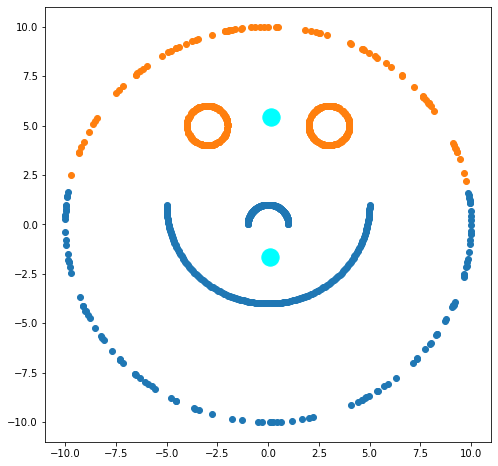

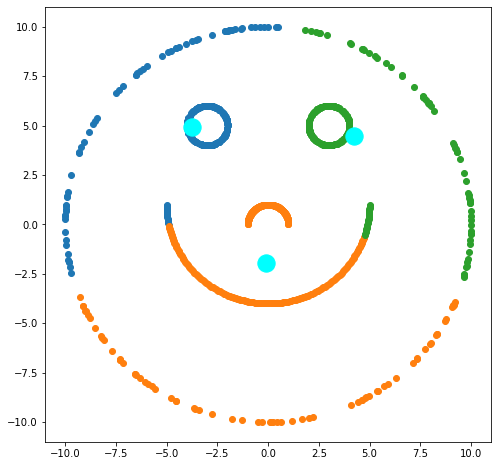

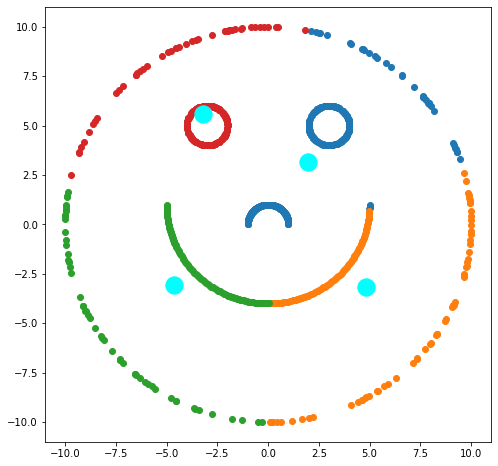

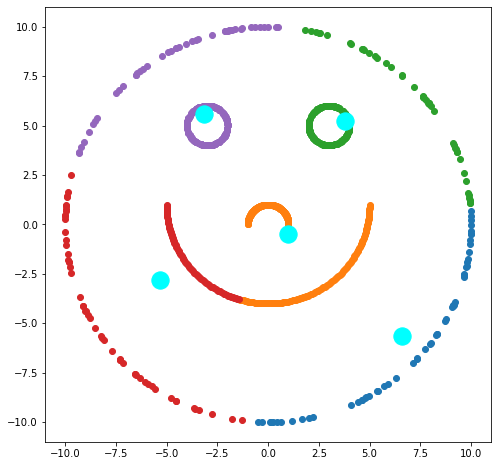

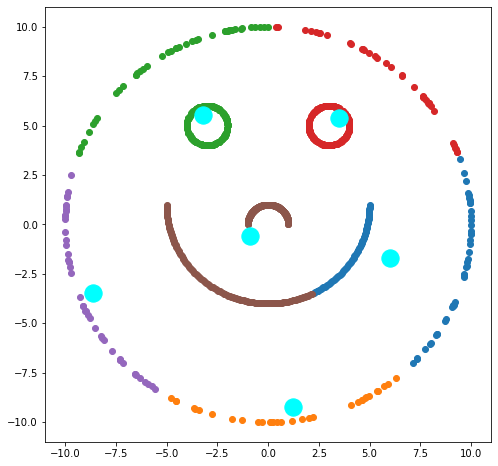

In [464]:
#calling k means++ function. Can be used to visualise the new clusters after using kmeans++
res=k_means_pp(7)   # set the value accordingly and see check the clusters

## Answer 1c

Finding the optimum value of k

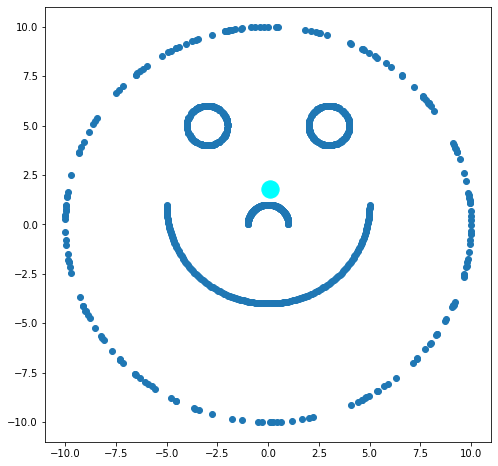

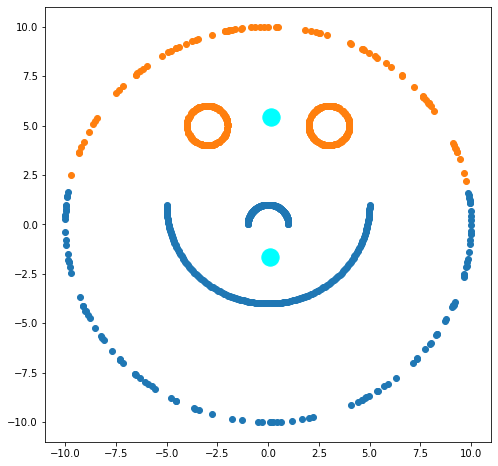

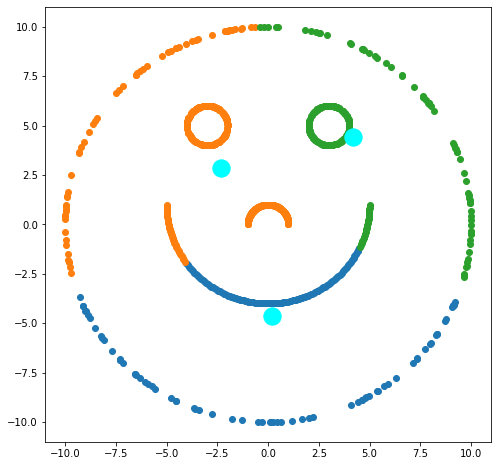

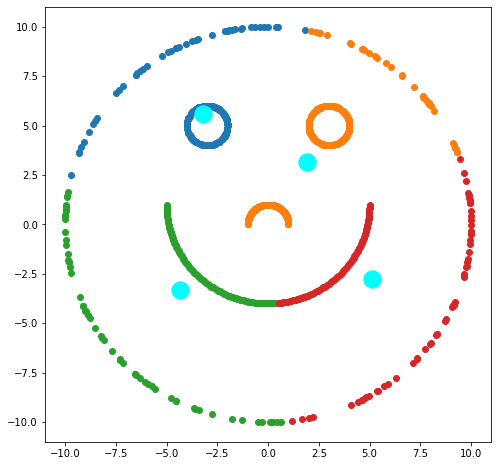

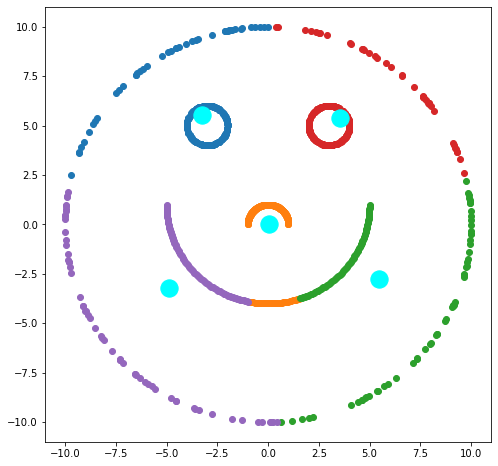

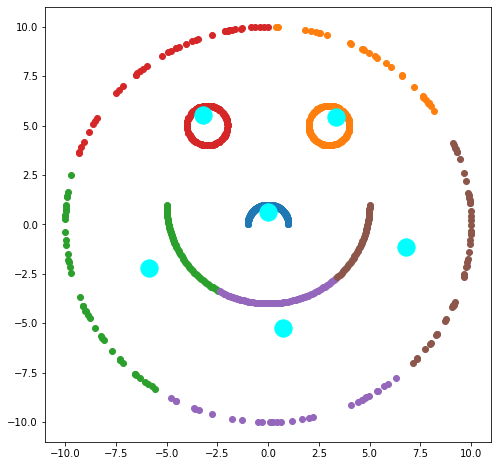

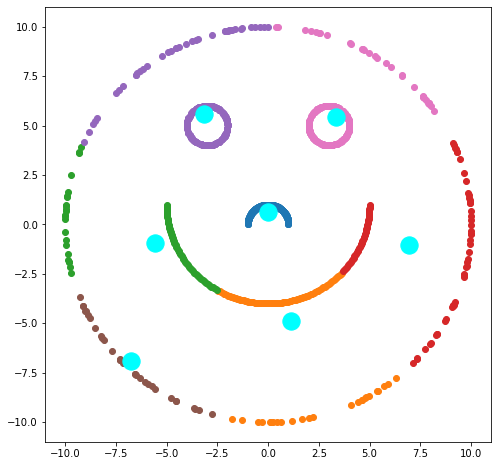

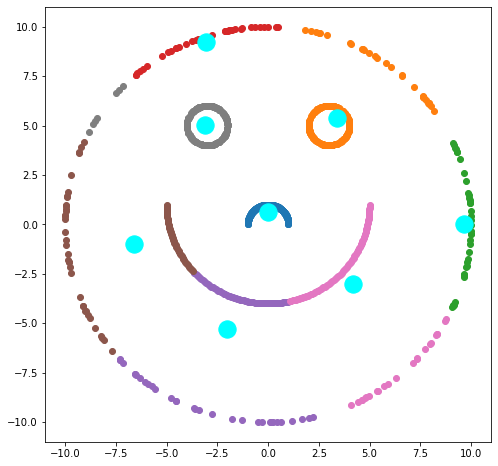

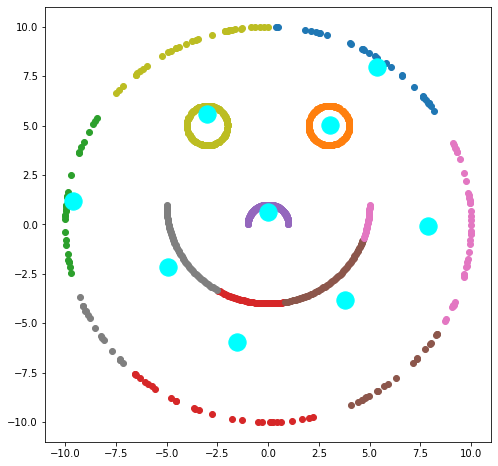

In [484]:
# I am going to plot the elbow method graph using the data returned by kmeans++ in res.
res=k_means_pp(10)


In [485]:
#Elbow method : we have to minimise the intra-cluster distance of all the points
elbow_dict={}
for key,value in res.items():
    centres=res[key][1]
    distance=0
    points=res[key][0]
    for key1,value1 in points.items():
        distance=distance+np.sum((res[key][0][key1]-centres[key1-1])**2)
        
    elbow_dict[key]=distance

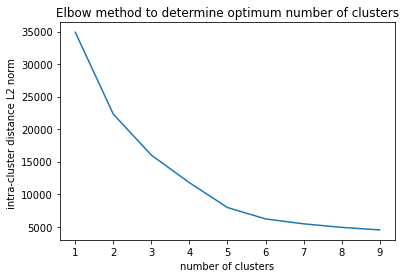

In [486]:
plt.title('Elbow method to determine optimum number of clusters') 
plt.xlabel("number of clusters")
plt.ylabel("intra-cluster distance L2 norm ")
x = list(elbow_dict.keys())           
y = list(elbow_dict.values())        
plt.plot(x, y, '-') 
plt.show()

#in general, elbow point is a point beyond which the loss doesnt decrease much if we increase teh number of clusters

## Answer 1d

In [519]:
#function to compute centres using kmeans++ in gaussian kernel
def kernelised_k_means_pp(kernel_matrix,cluster_range_max):
    for s in range(cluster_range_max,cluster_range_max+1):
        centres=reshape_array(2,0,True)

        #select first centre uniformly and randomly
        j=np.random.randint(n)
        centres=np.array([kernel_matrix[j]])

        dist=reshape_array(2,0,True)

        #algorithm to select the next s-1 centres 
        for k in range(2,s+1):
            dist=np.array([])
            for p in range(len(kernel_matrix)):
                dist=np.append(dist,np.min(np.sum((kernel_matrix[p]-centres)**2)))
        
            normalising_factor=np.sum(dist)
            prob_of_each_point=dist/normalising_factor    #calcualting the probabilities of each data point to be selected as centroid
            cumulative_prob_of_each_point=np.cumsum(prob_of_each_point)  #converting the probabilities to cumulative form
    
            u=np.random.uniform(0,1)

            next_cluster_index=-1
            for j in range(len(cumulative_prob_of_each_point)):
                if u<cumulative_prob_of_each_point[j]:
                    next_cluster_index=j
                    break
            
            centres=np.append(centres,[kernel_matrix[next_cluster_index]],axis=0)
        #k_means_pp_centres=centres.reshape(2,s)   
        #print(s)
        clust_dict,centres1=k_means(s,kernel_matrix,k_means_pp_centres)
        
        overall_clust_dict[s]=clust_dict,centres1
        
    return k_means_pp_centres





In [520]:
#function to compute means in gaussian system
def kmeans_gauss_kernel(no_of_clusters,kernel_matrix,X) :    #new argument kernel_matrix has been introduced. remainng all are same as kmeans++ algo
    cluster_dict={}
    cluster_dict_new={}
    centres=kernelised_k_means_pp(kernel_matrix,no_of_clusters) 
    for i in range(100):
        l2_norm=reshape_array(len(X),0,True)
        for k in range(no_of_clusters):
            curr_cluster=centres[:,k]
            curr_dist=np.sum((X-curr_cluster)**2,axis=1)  # compute l2 norms of current cluster from each point in X
            l2_norm=np.c_[l2_norm,curr_dist]   # <----------
        pos_of_min_dist_from_cluster=np.argmin(l2_norm,axis=1)+1  # pos=index+1

        
        #intialise each key of dictionary
        #cluster_dict_new  ---> dictionary for kernel matrix    
        for k in range(1,no_of_clusters+1):
            cluster_dict_new[k+1]=np.array([]).reshape(1000,0)
            cluster_dict[k+1]=np.array([]).reshape(2,0)   
            
        #now, update both cluster_dict_new  and cluster_dict      
        for k in range(len(X)):
            cluster_dict_new[pos_of_min_dist_from_cluster[i]]=np.c_[cluster_dict_new[pos_of_min_dist_from_cluster[i]],kmatrix[i]]
            cluster_dict[pos_of_min_dist_from_cluster[i]]=np.c_[cluster_dict[pos_of_min_dist_from_cluster[i]],X[i]]

        for k in range(1,no_of_clusters+1):
            cluster_dict_new[k+1]=cluster_dict_new[k+1].T
            cluster_dict[k+1]=cluster_dict[k+1].T

        #update mean of each cluster
        for k in range(no_of_clusters):
            centres[:,k]=np.mean(cluster_dict_new[k+1],axis=0)
    centres=np.transpose(centres)
    return centres,cluster_dict_new



In [521]:
#function to compute kernel matrix(symmetric)
def generate_kernel_matrix(X, sigma):
    no_of_data_points = len(X)
    kernel_matrix = np.zeros((no_of_data_points,no_of_data_points))

    #iterating over kernel matrix
    for i in range(no_of_data_points):
        for j in range(i, no_of_data_points):  #trying to save half iterations
            if i!=j:    
                kernel_matrix[i][j] = compute_higher_dimensional_distance(X[i], X[j], sigma)# computing pairwise distance. It is a symmetric matrix
                kernel_matrix[j][i] = kernel_matrix[i][j]
    
    return kernel_matrix

In [522]:
def compute_higher_dimensional_distance(X1, X2, sigma):
    norm = np.sum((X1 - X2)**2)
    return 2.78**(-norm/(2*(sigma**2)))

In [524]:
kernel_matrix = generate_kernel_matrix(X, sigma=4)
for i in range(8):
    centres,clust_dict=kernelised_k_means_pp( kernel_matrix, i)

for k in range(K):
    cluster = np.array(cluster[k])
    plt.scatter(cluster[:,0],cluster[:,1],label=labels[k])
plt.show()
##

ValueError: attempt to get argmin of an empty sequence

### Q2. Expectation-Maximization

We saw how to use EM to learn parameters for Gaussian mixture models last week. Specifically, for a GMM described by the set of parameters $\{\pi_k, \mu_k, \Sigma_k \}_{k=1}^K$, we saw that the E-step boils down to figuring out the expected assignment of clusters based on a responsibility judgment proportional to $\pi_k~N(\mu_k, \Sigma_k)$, given curent parameter estimates, followed by using GDA MLE updates assuming the current expected assignment in the M-step to update parameter values.

(a) Can you derive the E-step and M-step for an EM algorithm that would work for a Gaussian mixture model wherein the mixture weights $\pi_k$ are known, and the covariances are restricted to be spherical, i.e. $\Sigma_k = \sigma^2_k I$? [20 points]

(b) Implement this algorithm and show that it works on synthetic data with 3 clusters. If you are unable to derive the EM algorithm for part (a), implement the EM algorithm I showed in the class slides for the standard GMM (5 point penalty for taking this option) [15 points]. 

## Answer 2a

__Little background__: GMM (Gaussian Mixture Model) is used to give membership to points in one of several clusters. It is a "soft" probabilistic model. By soft, we mean that it assigns probabilities of belonging to each cluster rather than definite and fixed choice, for each point. __GMM tries to describe data assuming it comes from a mixture of gaussian distributions__.

In question, it is given that mixture weights $\pi_k$ are known. Also, the covariances must be spherical.

So,

According to question, GMM consists of K mixtures, $\theta$:  
$$=\{\mu_1,\mu_2,\mu_3,..,\mu_{k-1},\mu_k, \sigma_1 ^2,\sigma_2 ^2,\sigma_3 ^2,..,\sigma_{K-1} ^2,\sigma_K ^2\}$$

Assuming X is set of independent and identically distributed data points and Z be the set of corresponding latent variables, we proceed as follows:-
P($x_i$,$z_i$ | $\theta$) , by conditioning on $z_i$ :-
$$=P(x_i | (z_i,\theta))P(z_i | \theta)$$

Let $z_{ik}$ denote that $x_i$ belongs to kth cluster
So, we can write the above equation as:

$\prod_{k=1}^{K} \pi_k*(N(x_i | \mu_k,\sigma^2))^{z_ik}$

We can take log of both sides for ease in computation:
$log(P(x_i,z_i|\theta))= \sum_{k=1}^{K} z_{ik} \pi_k*(N(x_i | \mu_k,\sigma^2))^{z_ik}$

If we consider all the points in our data and denote a specific data point by n, the modified equation will hence be:

$log(P(X,Z | \theta))$
$$=\sum_{n=1}^N \sum_{k=1}^K  z_{nk} * log(\pi_k N(x_n|\mu_k,\sigma_k ^2))$$

$$=\sum_{n=1}^N \sum_{k=1}^K z_{nk}((log\frac{1}{(2\pi \sigma^2)^{d/2}} exp\{\frac{-(x_n - \mu_k)^2}{2\sigma_k ^2}\})+(log\pi_k))$$

Computation of $z_{nk}$ :
$$  P(z_{nk}=1|x_{n},\hat \theta) = \frac {P(x_{n}|z_{nk}=1,\hat \theta) \ P(z_{nk}=1|\hat \theta)}{\sum_{k^{'}=1}^{K} P(x_{n}|z_{nk^{'}=1}|\hat \theta) \ P(z_{nk^{'}=1}|\hat \theta)}$$<br><br>
$$ 
\begin{aligned}
&E\left[z_{n k}^{t}\right]=\frac{\pi_{k} N\left(x_{n} \mid \hat{\mu}_{k}, \hat{\sigma}_{k}^{2}I_{d}\right)}{\sum_{k=1}^{k} \pi_{k} N\left(x_n | \hat{\mu_{k}}, \hat{\sigma}_{k}^{2}I_{d}\right)} \quad \forall n, k \\
\end{aligned}
$$

$$ \newline$$


$
\hat{\theta}=argmax_{\theta} \sum_{n=1}^{N}\sum_{k=1}^{K} z_{n k}\left[\log \pi_{k}-\frac{(x_{n}-\mu_{k})^{2}}{2 \sigma_{k}^{2}}-\frac{d}{2} *\log 2 \pi-d *\log \sigma_{k}\right]
$


Now, to find optimum $\mu$ and $\sigma$, we can take pratial derivative wrt each one of them.

$$
\begin{aligned}
\frac{\partial P(x, z / \theta)}{\partial \sigma_{k}} = \sum_{n=1}^{N} z_{n k} \left[\frac{(x_n - \mu_k)^2}{\sigma_k^3} - \frac{d}{\sigma_k}\right] \\
= \sum_{n=1}^{N} z_{nk} * \left[\frac{(x_n - \mu_k)^2}{\sigma_k^2} - d \right]  \\
\end{aligned}
$$

Equating to zero, we get:
$$\frac{1}{\sigma_k ^2}\sum_{n=1} ^N z_{nk} * \frac{(x_n-\mu_k)^2}{1} = \sum_{n=1} ^N z_{nk} * \mu_k$$

Hence, $\sigma_k ^2$
$$=\frac{\sum_{n=1}^N z_{nk} * (x_n-\mu_k)^2}{d*\sum_{n=1} ^N z_{nk}}$$

Similarly,$\mu_k$
$$=\frac{\sum_{n=1}^N z_{nk} * x_n}{\sum_{n=1} ^N z_{nk}}$$

So, 
the E-step will be:
$$z_{nk}^{t+1} = \frac{N(x_n | \mu_k ^t,\sigma_k ^{t^2} *\pi_k }{\sum_{k=1}{K}N(x_n | \mu_k ^t , \sigma_k ^{t^2})}$$

and the M-step will be:
$$\mu_k ^{t+1} = \frac{\sum_{n=1}^{N} z_{nk} ^{t+1} *x_n}{\sum_{n=1}^{N}z_{nk} ^{t+1}}$$

$$ $$
$$\sigma_k ^{(t+1)^2}= \frac{\sum_{n=1}^N z_{nk}(x_n-\mu_k ^{t+1})^2}{d \sum_{n=1}^N z_{nk} ^{t+1}}$$

## Answer 2b

In [525]:
#function to compute log likelihood
def LL(X, centres, covariances):
    no_of_clusters = centres.shape[0]
    no_of_data_points = X.shape[0]

    LL = 0
    for z in data:

        Z = np.zeros(no_of_clusters)
        for k in range(no_of_clusters):

            Z[k] += np.log(weights[k])
            Z[k] =Z[k]-  ((no_dim * np.log(2*np.pi) + np.log(np.linalg.det(covs[k])) + exponent_term))/2
            exp = np.dot(delta.T, np.dot(np.linalg.inv(covariances[k]), delta))
            delta = np.array(k) - centres[k]

        LL =LL+ np.max(Z) + np.log(np.sum(np.exp(Z - np.max(Z))))

    return LL

In [ ]:
#function to compute EM
def EM(data, means, covariances):

    mat_e = np.zeros((no_data, no_clusters))
    LL = LL(data, means, covariances)

    no_of_data_points = data.shape[0]
    no_of_clusters = means[0]
    
    for iter in range(100):

        # computation of log likelihood
        LL_next = LL(data, means, covariances)
        # M step
        means = get_means(data, mat_e)
        # Maximizing step, getting t+1 covariance
        covariances = get_covariance(data, E_matrix, sum_of_E, means)

        #computation of exppectation
        mat_e = compute_E(data, weights, means, covariances)

        LL = LL_next

    return LL